<a href="https://colab.research.google.com/github/pritam-banik-roy/Software_Defect_Prediction/blob/main/Software_Deflection_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

Importing Packages

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/pc1.csv')


In [ ]:
print(df.head())

df.isnull().sum()

   McCabe's line count of code  McCabe "cyclomatic complexity”  \
0                          1.1                             1.4   
1                          1.0                             1.0   
2                         91.0                             9.0   
3                        109.0                            21.0   
4                        505.0                           106.0   

   McCabe "essential complexity”  McCabe "design complexity”  \
0                            1.4                         1.4   
1                            1.0                         1.0   
2                            3.0                         2.0   
3                            5.0                        18.0   
4                           41.0                        82.0   

   Halstead total operators + operands  Halstead "volume”  \
0                                  1.3               1.30   
1                                  1.0               1.00   
2                                31

McCabe's line count of code              0
McCabe "cyclomatic complexity”           0
McCabe "essential complexity”            0
McCabe "design complexity”               0
Halstead total operators + operands      0
Halstead "volume”                        0
Halstead "program length”                0
Halstead "difficulty”                    0
Halstead "intelligence”                  0
Halstead "effort”                        0
Halstead                                 0
Halstead's time estimator                0
Halstead's line count                    0
Halstead's count of lines of comments    0
Halstead's count of blank                0
lineslOCodeAndComment                    0
unique operators                         0
unique operands                          0
total operators                          0
total operands                           0
branchCount of the flow graph            0
defects                                  0
dtype: int64

Shuffling the dataset. Segementation into training and test set (80% - 20%) Normalizing the values

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['defects'], axis =1).values

y = df['defects'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])

train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size=0.2, random_state = 2)

Keras Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model = Sequential([
(Dense(32,activation = 'relu',input_shape = (21,))),
(BatchNormalization()),
(Dense(32,activation = 'relu')),
(BatchNormalization()),
(Dense(64,activation = 'relu')),
(Dense(64,activation = 'relu')),
(Dense(64,activation = 'relu')),
(Dense(64,activation = 'relu')),
(BatchNormalization()),
(Dense(32,activation = 'relu')),
(Dense(32,activation = 'relu')),
(Dense(1,activation = 'linear',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
])
ad = Adam(learning_rate = 0.0001)


model.compile(optimizer = ad, loss='hinge',metrics = ['accuracy'])

In [ ]:
scaler = MinMaxScaler(feature_range=[0,1])

train_X,test_X,train_Y,test_Y = train_test_split(X, y, test_size=0.2, random_state = 2)

Training

In [ ]:
model.fit(x = train_X, y = train_Y,validation_data=(test_X,test_Y), batch_size = 64, epochs =200)
model.summary()


Epoch 1/200
14/14 [==============================] - 5s 33ms/step - loss: 1.6975 - accuracy: 0.6381 - val_loss: 1.1464 - val_accuracy: 0.9234
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 1.5412 - accuracy: 0.7148 - val_loss: 1.1013 - val_accuracy: 0.9324
Epoch 3/200
14/14 [==============================] - 0s 8ms/step - loss: 1.3709 - accuracy: 0.8117 - val_loss: 1.0722 - val_accuracy: 0.9324
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 1.2557 - accuracy: 0.8410 - val_loss: 1.0470 - val_accuracy: 0.9324
Epoch 5/200
14/14 [==============================] - 0s 7ms/step - loss: 1.1446 - accuracy: 0.8625 - val_loss: 1.0222 - val_accuracy: 0.9369
Epoch 6/200
14/14 [==============================] - 0s 9ms/step - loss: 1.0680 - accuracy: 0.8625 - val_loss: 0.9949 - val_accuracy: 0.9369
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.9823 - accuracy: 0.8602 - val_loss: 0.9584 - val_accuracy: 0.9414
Epoch 8/200


In [ ]:
y_pred = model.predict(test_X)
y_pred = (y_pred >= 0.65).astype(int).ravel()



from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, roc_auc_score


svm_accuracy = accuracy_score(test_Y, y_pred)
print('Accuracy (ANN +SVM): ', "%.2f" % (svm_accuracy*100))
precision = precision_score(test_Y, y_pred)
print('Precision: %f' % precision)

recall = recall_score(test_Y, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(test_Y, y_pred)
print('F1 score: %f' % f1)

print('R2 Score:', roc_auc_score(test_Y,y_pred))


7/7 [==============================] - 0s 3ms/step
Accuracy (ANN +SVM):  94.14
Precision: 0.333333
Recall: 0.083333
F1 score: 0.133333
R2 Score: 0.5369047619047619


Results

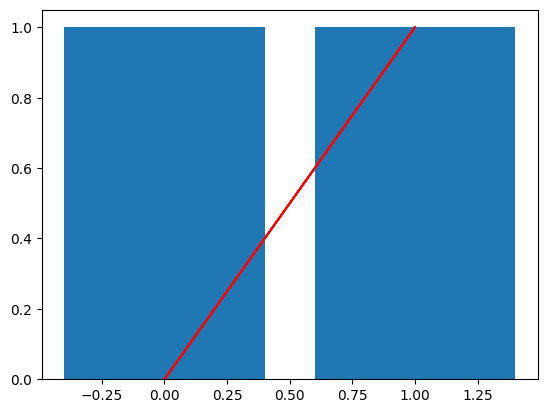

In [ ]:

from sklearn import metrics


fig = plt.pyplot.plot(figsize=(10,5))
plt.pyplot.bar(test_Y,y_pred)

plt.pyplot.plot(test_Y,test_Y,'r')



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


y_pred = model.predict(test_X)
y_pred = (y_pred >= 0.6).astype(int).ravel()


accuracy = accuracy_score(test_Y, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(test_Y, y_pred)
print('Precision: %f' % precision)

recall = recall_score(test_Y, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(test_Y, y_pred)
print('F1 score: %f' % f1)

7/7 [==============================] - 0s 6ms/step
Accuracy: 0.941441
Precision: 0.333333
Recall: 0.083333
F1 score: 0.133333


In [ ]:
from imblearn.over_sampling import SMOTE

Decision_Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



df.defects=df['defects']*1

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


smote = SMOTE(sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
DT_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

cm = confusion_matrix(y_test, DT_pred)
cm

array([[158,  40],
       [ 34, 181]])

In [ ]:
print('Accuracy score:',accuracy_score(y_test,DT_pred))
print('F1_score:',f1_score(y_test,DT_pred))
print('precision_score:',precision_score(y_test,DT_pred))
print('recall_score:',recall_score(y_test,DT_pred))

Accuracy score: 0.8208232445520581
F1_score: 0.8302752293577982
precision_score: 0.8190045248868778
recall_score: 0.8418604651162791


Gussian_Naive_Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
GaussianNB()

GaussianNB()

In [ ]:
GNB_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

CM = confusion_matrix(y_test,GNB_pred)
CM

array([[178,  20],
       [141,  74]])

In [ ]:
print('Accuracy score:',accuracy_score(y_test,GNB_pred))
print('F1_score:',f1_score(y_test,GNB_pred))
print('precision_score:',precision_score(y_test,GNB_pred))
print('recall_score:',recall_score(y_test,GNB_pred))

Accuracy score: 0.6101694915254238
F1_score: 0.4789644012944984
precision_score: 0.7872340425531915
recall_score: 0.34418604651162793


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNN_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

CM = confusion_matrix(y_test,KNN_pred)
CM

array([[182,  16],
       [  7, 208]])

In [ ]:
print('Accuracy score:',accuracy_score(y_test,KNN_pred))
print('F1_score:',f1_score(y_test,KNN_pred))
print('precision_score:',precision_score(y_test,KNN_pred))
print('recall_score:',recall_score(y_test,KNN_pred))

Accuracy score: 0.9443099273607748
F1_score: 0.9476082004555809
precision_score: 0.9285714285714286
recall_score: 0.9674418604651163


In [ ]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

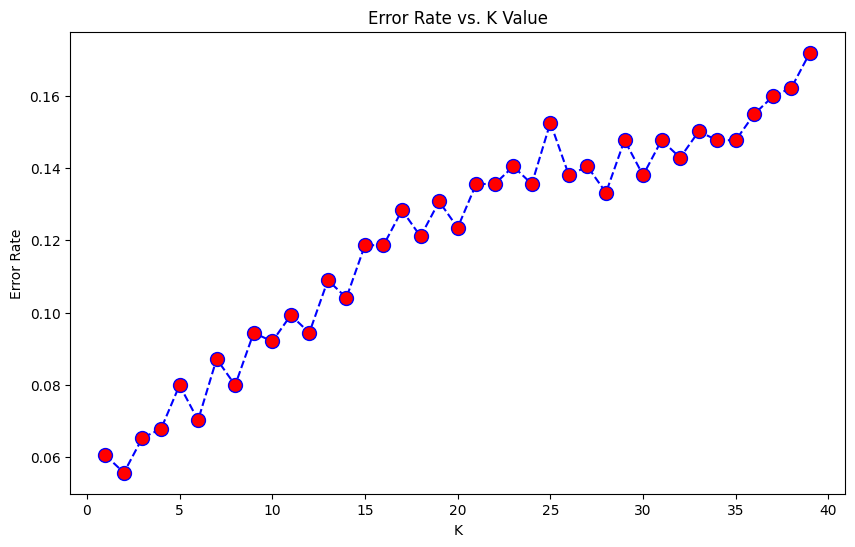

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Support_Vector_Classification

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
SVC_pred= classifier.predict(X_test)

In [ ]:
CM = confusion_matrix(y_test,SVC_pred)
CM

array([[155,  43],
       [ 27, 188]])

In [ ]:
print('Accuracy score:',accuracy_score(y_test,SVC_pred))
print('F1_score:',f1_score(y_test,SVC_pred))
print('precision_score:',precision_score(y_test,SVC_pred))
print('recall_score:',recall_score(y_test,SVC_pred))

Accuracy score: 0.8305084745762712
F1_score: 0.8430493273542601
precision_score: 0.8138528138528138
recall_score: 0.8744186046511628


# **SMOTE**

***SVM***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = svm_model.predict(X_test_scaled)

#  Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.7252252252252253
Precision: 0.2
Recall: 0.7368421052631579
G-Mean: 0.7677718959499145


***DECISION*** TREE

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = dt_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.8873873873873874
Precision: 0.36363636363636365
Recall: 0.42105263157894735
G-Mean: 0.517631706652575


#KNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = knn_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.8108108108108109
Precision: 0.2553191489361702
Recall: 0.631578947368421
G-Mean: 0.6858022659924021


#MLP CLASSIFIER

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


mlp_model = MLPClassifier()
mlp_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = mlp_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.8648648648648649
Precision: 0.3225806451612903
Recall: 0.5263157894736842
G-Mean: 0.5971067765037417


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#LOGISTIC REGRESSION

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = lr_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.7522522522522522
Precision: 0.20967741935483872
Recall: 0.6842105263157895
G-Mean: 0.73535503592651


#GaussianNB

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = nb_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.8468468468468469
Precision: 0.2
Recall: 0.2631578947368421
G-Mean: 0.45883146774112354


#ADASYN

**SVM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = svm_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.7792792792792793
Precision: 0.23214285714285715
Recall: 0.6842105263157895
G-Mean: 0.7248282140270369


# *DT*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = dt_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)

Accuracy: 0.8963963963963963
Precision: 0.4090909090909091
Recall: 0.47368421052631576
G-Mean: 0.5290598323631228


***KNN***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = knn_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.7882882882882883
Precision: 0.23076923076923078
Recall: 0.631578947368421
G-Mean: 0.6970150353573228


**MLP**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

mlp_model = MLPClassifier()
mlp_model.fit(X_train_resampled, y_train_resampled)

X_test_scaled = scaler.transform(X_test)


y_pred = mlp_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)



Accuracy: 0.8513513513513513
Precision: 0.3055555555555556
Recall: 0.5789473684210527
G-Mean: 0.634071591877235


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LOGISTIC **REGRESSION**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)

y_pred = lr_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.8243243243243243
Precision: 0.2916666666666667
Recall: 0.7368421052631579
G-Mean: 0.722447108487122


***GaussianNB***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)


nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)


X_test_scaled = scaler.transform(X_test)


y_pred = nb_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.8648648648648649
Precision: 0.23809523809523808
Recall: 0.2631578947368421
G-Mean: 0.447773662839645


# RandomOverSampler

### **SVM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)


svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

X_test_scaled = scaler.transform(X_test)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.7207207207207207
Precision: 0.2054794520547945
Recall: 0.7894736842105263
G-Mean: 0.7919930960351028


### DT

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.9099099099099099
Precision: 0.47368421052631576
Recall: 0.47368421052631576
G-Mean: 0.49930699897395464


### KNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)


y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.8243243243243243
Precision: 0.1875
Recall: 0.3157894736842105
G-Mean: 0.5065362251294778


### **MLP**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


mlp_model = MLPClassifier()
mlp_model.fit(X_train_resampled, y_train_resampled)


y_pred = mlp_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.1981981981981982
Precision: 0.09644670050761421
Recall: 1.0
G-Mean: 0.9505542064987066


### **LR**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


y_pred = lr_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.7927927927927928
Precision: 0.2127659574468085
Recall: 0.5263157894736842
G-Mean: 0.6436875846301083


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **NB**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)


y_pred = nb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
g_mean = np.sqrt(recall * (1 - precision))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("G-Mean:", g_mean)


Accuracy: 0.8738738738738738
Precision: 0.2631578947368421
Recall: 0.2631578947368421
G-Mean: 0.44034738238635557
